<a href="https://colab.research.google.com/github/Ashok17kumaravel/Network-Intrusion-System/blob/main/Network_Intrusion_Tree_Based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tree-Based Intelligent Intrusion  System in Internet of Vehicles

## **Import libraries**

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

# **Read the dataset**

In [23]:
df = pd.read_csv('/content/CICIDS2017_sample.csv')

In [24]:
df['Label'].value_counts()

BENIGN          45462
DoS             38070
PortScan        15892
BruteForce       5534
WebAttack        4360
Bot              3932
Infiltration       72
Name: Label, dtype: int64

In [25]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df = df.fillna(0)

In [26]:
df['Label'] = df['Label'].astype(str)


# **Split Train set and Test set**

In [27]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [28]:
X_train.shape

(90657, 77)

In [29]:
pd.Series(y_train).value_counts()

0    36369
3    30456
5    12713
2     4427
6     3488
1     3146
4       58
dtype: int64

# **Oversampling by SMOTE**

In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(n_jobs=-1, sampling_strategy={4:1500})



In [31]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [32]:
pd.Series(y_train).value_counts()

0    36369
3    30456
5    12713
2     4427
6     3488
1     3146
4     1500
dtype: int64

# **Machine learning model training**
# **Training four base learners: decision tree, random forest, extra trees, XGBoost**

Accuracy of DT: 0.998941098610192
Precision of DT: 0.9989525638542233
Recall of DT: 0.998941098610192
F1-score of DT: 0.9989437907890615
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9093
           1       1.00      1.00      1.00       786
           2       1.00      1.00      1.00      1107
           3       1.00      1.00      1.00      7614
           4       0.88      1.00      0.93        14
           5       1.00      1.00      1.00      3179
           6       1.00      1.00      1.00       872

    accuracy                           1.00     22665
   macro avg       0.98      1.00      0.99     22665
weighted avg       1.00      1.00      1.00     22665



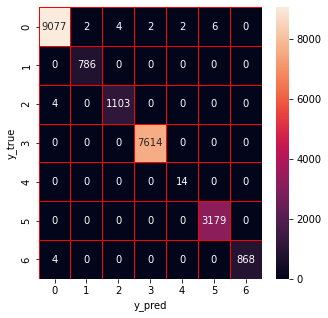

In [34]:
# Decision tree training and prediction
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [35]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 0.9980145598941098
Precision of RF: 0.9980150338093656
Recall of RF: 0.9980145598941098
F1-score of RF: 0.9980136400907782
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9093
           1       0.99      0.99      0.99       786
           2       1.00      1.00      1.00      1107
           3       1.00      1.00      1.00      7614
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00      3179
           6       1.00      0.99      1.00       872

    accuracy                           1.00     22665
   macro avg       1.00      1.00      1.00     22665
weighted avg       1.00      1.00      1.00     22665



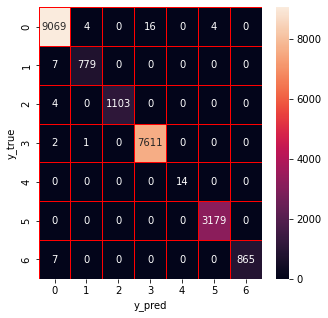

In [36]:
# Random Forest training and prediction
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [37]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 0.998941098610192
Precision of ET: 0.9989417825931562
Recall of ET: 0.998941098610192
F1-score of ET: 0.9989408953626115
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9093
           1       0.99      1.00      1.00       786
           2       1.00      1.00      1.00      1107
           3       1.00      1.00      1.00      7614
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00      3179
           6       1.00      1.00      1.00       872

    accuracy                           1.00     22665
   macro avg       1.00      1.00      1.00     22665
weighted avg       1.00      1.00      1.00     22665



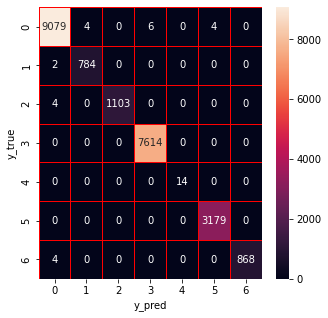

In [38]:
# Extra trees training and prediction
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [39]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 0.9438341054489301
Precision of XGBoost: 0.9457515411729769
Recall of XGBoost: 0.9438341054489301
F1-score of XGBoost: 0.9435298333219506
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      9093
           1       0.79      0.95      0.87       786
           2       0.99      0.78      0.87      1107
           3       0.93      0.98      0.96      7614
           4       0.65      0.79      0.71        14
           5       1.00      0.99      0.99      3179
           6       0.98      0.88      0.93       872

    accuracy                           0.94     22665
   macro avg       0.90      0.90      0.89     22665
weighted avg       0.95      0.94      0.94     22665



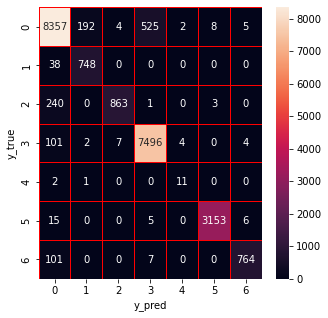

In [40]:
# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [41]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

# **Stacking model construction (ensemble for 4 base learners)**

In [44]:
# Use the outputs of 4 base models to construct a new ensemble model
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(10)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,0,0,0,0
1,3,3,3,3
2,3,3,3,3
3,0,0,0,0
4,4,4,4,4
5,3,3,3,3
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,3,3,3,3


In [45]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [46]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

In [47]:
stk = xgb.XGBClassifier().fit(x_train, y_train)

Accuracy of Stacking: 0.9991175821751599
Precision of Stacking: 0.9991289065234082
Recall of Stacking: 0.9991175821751599
F1-score of Stacking: 0.9991203069976831
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9093
           1       1.00      1.00      1.00       786
           2       1.00      1.00      1.00      1107
           3       1.00      1.00      1.00      7614
           4       0.88      1.00      0.93        14
           5       1.00      1.00      1.00      3179
           6       1.00      1.00      1.00       872

    accuracy                           1.00     22665
   macro avg       0.98      1.00      0.99     22665
weighted avg       1.00      1.00      1.00     22665



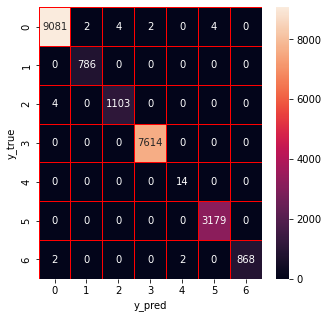

In [48]:
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# **Feature Selection**
  #     **Feature importance**

In [49]:
# Save the feature importance lists generated by four tree-based algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xgb_feature = xg.feature_importances_

In [50]:
# calculate the average importance value of each feature
avg_feature = (dt_feature + rf_feature + et_feature + xgb_feature)/4

In [51]:
feature=(df.drop(['Label'],axis=1)).columns.values
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True))

Features sorted by their score:
[(0.1217, 'Bwd Packet Length Std'), (0.0911, 'Bwd Packet Length Min'), (0.0761, 'Average Packet Size'), (0.049, 'Init_Win_bytes_forward'), (0.0471, 'Init_Win_bytes_backward'), (0.0414, 'Bwd Packet Length Mean'), (0.0376, 'PSH Flag Count'), (0.0358, 'Bwd Packets/s'), (0.0283, 'Avg Bwd Segment Size'), (0.0223, 'Packet Length Variance'), (0.0216, 'Fwd Header Length.1'), (0.0208, 'Bwd Header Length'), (0.0195, 'Packet Length Mean'), (0.0191, 'Max Packet Length'), (0.0185, 'Packet Length Std'), (0.018, 'Bwd Packet Length Max'), (0.0175, 'Fwd Header Length'), (0.0171, 'Min Packet Length'), (0.0162, 'Total Length of Bwd Packets'), (0.0156, 'ACK Flag Count'), (0.0136, 'Flow IAT Max'), (0.0133, 'Total Backward Packets'), (0.0124, 'Total Length of Fwd Packets'), (0.0119, 'Fwd IAT Max'), (0.0106, 'Fwd Packet Length Mean'), (0.0105, 'min_seg_size_forward'), (0.0097, 'Total Fwd Packets'), (0.0093, 'Subflow Bwd Bytes'), (0.0091, 'Down/Up Ratio'), (0.0083, 'Flow Durati

In [52]:
f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)

In [53]:
len(f_list)

77

In [54]:
# Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if Sum>=0.9:
        break        

In [55]:
X_fs = df[fs].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [57]:
X_train.shape

(90657, 38)

In [58]:
pd.Series(y_train).value_counts()

0    36369
3    30456
5    12713
2     4427
6     3488
1     3146
4       58
dtype: int64

# **Oversampling by SMOTE**

In [59]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={4:1500})

In [60]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [61]:
pd.Series(y_train).value_counts()

0    36369
3    30456
5    12713
2     4427
6     3488
1     3146
4     1500
dtype: int64

# **Machine learning model training after feature selection**

Accuracy of DT: 0.998764615045224
Precision of DT: 0.9987656244319576
Recall of DT: 0.998764615045224
F1-score of DT: 0.9987646576246683
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9093
           1       1.00      1.00      1.00       786
           2       1.00      1.00      1.00      1107
           3       1.00      1.00      1.00      7614
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00      3179
           6       0.99      1.00      0.99       872

    accuracy                           1.00     22665
   macro avg       1.00      1.00      1.00     22665
weighted avg       1.00      1.00      1.00     22665



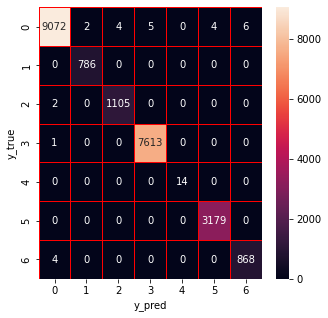

In [62]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [63]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 0.9986322523714979
Precision of RF: 0.9986329863307292
Recall of RF: 0.9986322523714979
F1-score of RF: 0.9986314831990689
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9093
           1       1.00      1.00      1.00       786
           2       1.00      1.00      1.00      1107
           3       1.00      1.00      1.00      7614
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00      3179
           6       1.00      0.99      1.00       872

    accuracy                           1.00     22665
   macro avg       1.00      1.00      1.00     22665
weighted avg       1.00      1.00      1.00     22665



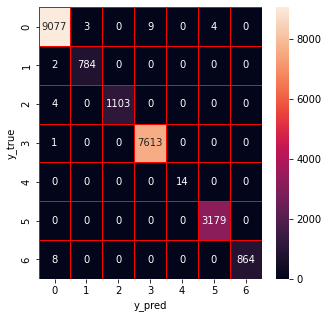

In [64]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [65]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 0.9991175821751599
Precision of ET: 0.9991179597853601
Recall of ET: 0.9991175821751599
F1-score of ET: 0.999117296069311
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9093
           1       1.00      1.00      1.00       786
           2       1.00      1.00      1.00      1107
           3       1.00      1.00      1.00      7614
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00      3179
           6       1.00      1.00      1.00       872

    accuracy                           1.00     22665
   macro avg       1.00      1.00      1.00     22665
weighted avg       1.00      1.00      1.00     22665



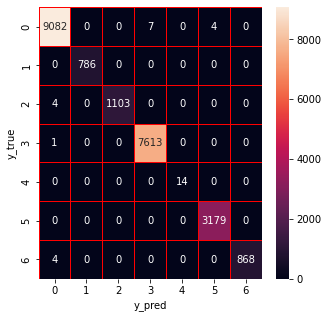

In [66]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [67]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 0.9406574012795058
Precision of XGBoost: 0.9418448278647628
Recall of XGBoost: 0.9406574012795058
F1-score of XGBoost: 0.9403648552240702
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9093
           1       0.82      0.93      0.87       786
           2       0.99      0.78      0.87      1107
           3       0.94      0.97      0.95      7614
           4       0.65      0.79      0.71        14
           5       1.00      0.99      0.99      3179
           6       0.96      0.88      0.92       872

    accuracy                           0.94     22665
   macro avg       0.90      0.89      0.89     22665
weighted avg       0.94      0.94      0.94     22665



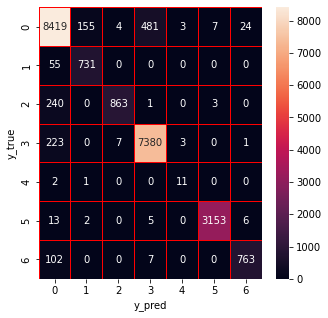

In [68]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [69]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

# **Stacking model construction**

In [71]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(10)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,0,0,0,0
1,3,3,3,3
2,3,3,3,3
3,0,0,0,0
4,4,4,4,4
5,3,3,3,3
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,3,3,3,3


In [72]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [73]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 0.998764615045224
Precision of Stacking: 0.9987656244319576
Recall of Stacking: 0.998764615045224
F1-score of Stacking: 0.9987646576246683
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9093
           1       1.00      1.00      1.00       786
           2       1.00      1.00      1.00      1107
           3       1.00      1.00      1.00      7614
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00      3179
           6       0.99      1.00      0.99       872

    accuracy                           1.00     22665
   macro avg       1.00      1.00      1.00     22665
weighted avg       1.00      1.00      1.00     22665



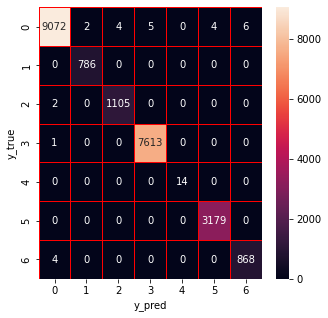

In [74]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# **END**